## Q7)The Reuters corpus
Revisit the Reuters C50 text corpus that we briefly explored in class. Your task is simple: tell an interesting story, anchored in some analytical tools we have learned in this class, using this data. For example:

you could cluster authors or documents and tell a story about what you find. you could look for common factors using PCA. you could train a predictive model and assess its accuracy, constructing features for each document that maximize performance. you could do anything else that strikes you as interesting with this data. Describe clearly what question you are trying to answer, what models you are using, how you pre-processed the data, and so forth. Make sure you include at least one really interesting plot (although more than one might be necessary, depending on your question and approach.)

Format your write-up in the following sections, some of which might be quite short:

Question: What question(s) are you trying to answer? Approach: What approach/statistical tool did you use to answer the questions? Results: What evidence/results did your approach provide to answer the questions? (E.g. any numbers, tables, figures as appropriate.) Conclusion: What are your conclusions about your questions? Provide a written interpretation of your results, understandable to stakeholders who might plausibly take an interest in this data set. Regarding the data itself: In the C50train directory, you have 50 articles from each of 50 different authors (one author per directory). Then in the C50test directory, you have another 50 articles from each of those same 50 authors (again, one author per directory). This train/test split is obviously intended for building predictive models, but to repeat, you need not do that on this problem. You can tell any story you want using any methods you want. Just make it compelling!

Note: if you try to build a predictive model, you will need to figure out a way to deal with words in the test set that you never saw in the training set. This is a nontrivial aspect of the modeling exercise. (E.g. you might simply ignore those new words.)

This question will be graded according to three criteria:

the overall "interesting-ness" of your question and analysis. the clarity of your description. We will be asking ourselves: could your analysis be reproduced by a competent data scientist based on what you've said? (That's good.) Or would that person have to wade into the code in order to understand what, precisely, you've done? (That's bad.) technical correctness (i.e. did you make any mistakes in execution or interpretation?)

### For this problem statement we will try to solve 3 basic questions

### 1.Divide authors into different clusters by writing style using t-SNE and k means clustering.

### 2.Use Latent Dirichlet Allocation (LDA) to perform topic modelling on the corpus of data and find the top keywords associated to the selected topic.

### 3.Create a author classification model to predict the authors associated with a particular text by providing an average sentiment score.

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer

nltk.download('punkt') # for tokenizing
nltk.download('stopwords') # 
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("../input/uci-reuters-50-50/C50train")
test_texts, test_labels = read_data_from_directory("../input/uci-reuters-50-50/C50test")


In [5]:
train_df = pd.DataFrame(train_labels,train_texts).reset_index().rename(columns = {'index': 'Text',0:'Author'})
test_df = pd.DataFrame(test_labels,test_texts).reset_index().rename(columns = {'index': 'Text',0:'Author'})
combined_df = pd.concat([train_df, test_df], ignore_index=True)
combined_df

,Text,Author
0,Britain's commercial television watchdog on Th...,KeithWeir
1,"Marjorie Scardino, set to become Pearson chief...",KeithWeir
2,English football champions Manchester United e...,KeithWeir
3,"Wembley, England's home of soccer since the 19...",KeithWeir
4,Executives from British Telecom Plc and MCI Co...,KeithWeir
...,...,...
4995,Pop star Michael Jackson launched his first co...,JohnMastrini
4996,The outgoing vice-chairman of Czech Skoda Auto...,JohnMastrini
4997,Czech Deputy Finance Minister Vladimir Rudlovc...,JohnMastrini
4998,The Czech cabinet will adopt a carrot-and-stic...,JohnMastrini


## 1. Clustering and Sentiment Analysis

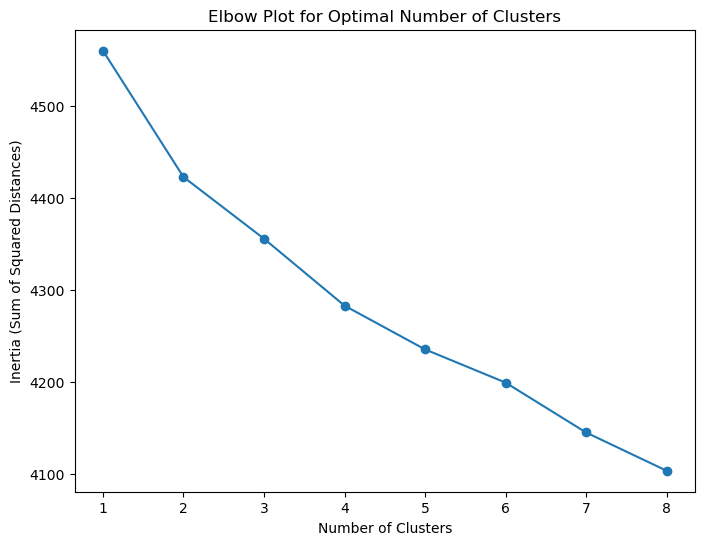

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Specify the actual column names containing text and author information
text_column = 'Text'    # Replace with the actual column name for the text data
author_column = 'Author'  # Replace with the actual column name for the author information

# Preprocess the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Adjust max_features and stopwords as needed
tfidf_matrix = vectorizer.fit_transform(combined_df[text_column])

# Apply t-SNE to reduce dimensionality to 2D
num_components = 2
tsne = TSNE(n_components=num_components, random_state=42)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

# Determine the optimal number of clusters using the elbow method
max_clusters = 8  # Maximum number of clusters to consider
inertia_values = []  # List to store the sum of squared distances (inertia) for each cluster count
for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot to select the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.title("Elbow Plot for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()




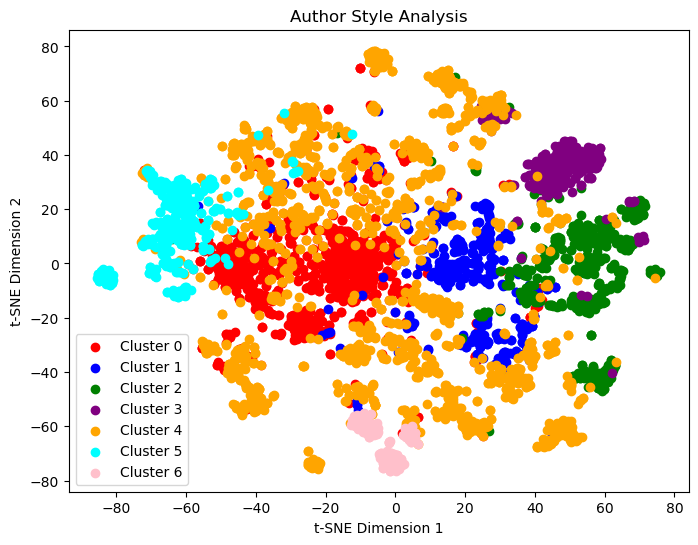

Cluster 0 - Authors: KeithWeir, JoWinterbottom, DavidLawder, EricAuchard, AlanCrosby, MichaelConnor, JonathanBirt, SimonCowell, PierreTran, TimFarrand, JoeOrtiz, HeatherScoffield, WilliamKazer, KevinMorrison, RobinSidel, TanEeLyn, KirstinRidley, KevinDrawbaugh, TheresePoletti, KouroshKarimkhany, ToddNissen, GrahamEarnshaw, MarkBendeich, PatriciaCommins, DarrenSchuettler, SamuelPerry, MarcelMichelson, NickLouth, KarlPenhaul, EdnaFernandes, BradDorfman, LydiaZajc, BernardHickey, JanLopatka, MartinWolk, AlexanderSmith, BenjaminKangLim, AaronPressman, SarahDavison, JohnMastrini
Cluster 1 - Authors: JoWinterbottom, AlanCrosby, SimonCowell, PierreTran, JoeOrtiz, WilliamKazer, KevinMorrison, AaronPressman, KevinDrawbaugh, SarahDavison, GrahamEarnshaw, MarkBendeich, JaneMacartney, DarrenSchuettler, BradDorfman, FumikoFujisaki, LydiaZajc, BernardHickey, JanLopatka, MatthewBunce, AlexanderSmith, JohnMastrini, LynneO'Donnell, HeatherScoffield, RobinSidel, MureDickie, MarcelMichelson
Cluster 2 - A

In [15]:
# Based on the elbow plot, select the optimal number of clusters
# You can visually inspect the plot to determine the "elbow" point where inertia starts to decrease more slowly
optimal_clusters = 7 # Update with the chosen number of clusters

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

# Add the cluster labels to the DataFrame for further analysis
combined_df['Cluster'] = cluster_labels

# Visualize the t-SNE results with different colors for each cluster
plt.figure(figsize=(8, 6))

# Specify unique colors for each cluster
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan','pink','magenta','yellow','grey','brown']

# Iterate over unique clusters and plot data points with the corresponding color
for i in range(optimal_clusters):
    cluster_data = tsne_result[cluster_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}', color=colors[i])

plt.title("Author Style Analysis")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()

# Analyze the writing style characteristics of each cluster
for i in range(optimal_clusters):
    cluster_data = combined_df[combined_df['Cluster'] == i]
    print(f"Cluster {i} - Authors: {', '.join(cluster_data[author_column].unique())}")
    # Perform style analysis for each cluster based on the text data
    # Example: analyze_word_frequency(cluster_data[text_column])

## Result Interpretation

* Some very strong and clear clusters can be observed in the dataset. For example cluster 2, cluster 3, cluster 5 and cluster 6 look to be closely associated in feature space.
* Interested stakeholders can use these results for wide variety of operations like:
1. Tailoring content recommendations for specific writing clusters
2. Identifying and nurturing emerging authors with unique styles
3. Enhancing content personalization by understanding writing preferences

## 2.Topic Modelling using LDA

In [6]:
warnings.filterwarnings("ignore")
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim
import multiprocessing
from tqdm import tqdm
import spacy

# Loading the spaCy English model
nlp = spacy.load("en_core_web_sm")


# Preprocessing the "Text" column (tokenization, lowercase, stopwords, lemmatization)
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
    return tokens

# Setting the number of CPU cores for parallel processing
num_cores = multiprocessing.cpu_count()

# Using parallel processing to preprocess the "Text" column
with multiprocessing.Pool(num_cores) as pool:
    combined_df['text_tokens'] = list(tqdm(pool.imap(preprocess_text, combined_df['Text']), total=len(combined_df)))

# Creating a dictionary representation of the titles
dictionary = corpora.Dictionary(combined_df['text_tokens'])

# Creating a corpus: a list of bag-of-words (BoW) representations of each title
corpus = [dictionary.doc2bow(tokens) for tokens in combined_df['text_tokens']]

# Building the LDA model
num_topics = 10  # We will identify 10 topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Printing the topics and their top keywords
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Visualizing the topics
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)


100%|██████████| 5000/5000 [03:57<00:00, 21.09it/s]


(0, '0.032*"say" + 0.014*"bank" + 0.011*"company" + 0.008*"market" + 0.008*"analyst"')
(1, '0.025*"say" + 0.008*"year" + 0.006*"china" + 0.006*"government" + 0.006*"right"')
(2, '0.035*"say" + 0.018*"million" + 0.013*"year" + 0.012*"company" + 0.011*"percent"')
(3, '0.029*"say" + 0.007*"year" + 0.006*"company" + 0.005*"industry" + 0.005*"strike"')
(4, '0.030*"say" + 0.016*"share" + 0.015*"bank" + 0.011*"million" + 0.010*"stock"')
(5, '0.033*"say" + 0.013*"percent" + 0.011*"analyst" + 0.011*"company" + 0.011*"year"')
(6, '0.035*"say" + 0.012*"china" + 0.010*"tonne" + 0.009*"year" + 0.006*"million"')
(7, '0.025*"say" + 0.014*"china" + 0.010*"kong" + 0.010*"hong" + 0.009*"deng"')
(8, '0.031*"say" + 0.013*"percent" + 0.012*"year" + 0.010*"market" + 0.010*"bank"')
(9, '0.027*"say" + 0.008*"year" + 0.008*"thomson" + 0.007*"percent" + 0.007*"group"')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Result Interpretation

* Our model identified a set of 10 topics within the corpus of text documents and displays top keywords for each identified topic to provide an understanding of the primary themes or content associated with each topic.
* We used pyLDAvis library to create an interactive visualization of the topics. This visualization helps in comprehending the distribution of topics and their relationships within the text data.
* Some possible Applications:
1.Stakeholders can identify the top keywords associated with each topic to categorize and label different content themes.

2.By understanding the primary topics of the documents, stakeholders can curate and recommend relevant content to users based on their interests.

3.Stakeholders can gain insights into the most prevalent topics across the dataset. This information can guide content creation strategies and help identify content gaps.

## 3. Author Classification

In [54]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import spacy


# Specify the actual column names containing text and author information
text_column = 'Text'    # Replace with the actual column name for the text data
author_column = 'Author'  # Replace with the actual column name for the author information

# Download the English language model for spaCy (if not already downloaded)
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading the English language model for spaCy...")
    import subprocess
    subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load("en_core_web_sm")








In [16]:
train_df

,Text,Author
0,Britain's commercial television watchdog on Th...,KeithWeir
1,"Marjorie Scardino, set to become Pearson chief...",KeithWeir
2,English football champions Manchester United e...,KeithWeir
3,"Wembley, England's home of soccer since the 19...",KeithWeir
4,Executives from British Telecom Plc and MCI Co...,KeithWeir
...,...,...
2495,The Czech Republic has its first Senate since ...,JohnMastrini
2496,The Czech government's tourism office on Wedne...,JohnMastrini
2497,Germany and the Czech republic will initial a ...,JohnMastrini
2498,Germany and the Czech Republic on Friday concl...,JohnMastrini


In [22]:
import pandas as pd
import lightgbm as lgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have train_df and test_df already loaded

# 1. Data preprocessing
# Combine train and test data for consistent preprocessing
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# 2. Feature engineering
# Convert the "Text" column into numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X = tfidf.fit_transform(combined_df['Text'])

# Split the combined data back into train and test
X_train = X[:len(train_df)]
X_test = X[len(train_df):]

# Define models with initial parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, train_df['Author'])
    
    # Make predictions on the test set
    test_predictions = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(test_df['Author'], test_predictions)
    
    # Print results
    print(f"Model: {model_name}")
    print(f"Test Set Accuracy: {accuracy:.4f}")
    print("Classification Report on Test Set:")
    print(classification_report(test_df['Author'], test_predictions))
    print("=" * 60)


Model: Logistic Regression
Test Set Accuracy: 0.6520
Classification Report on Test Set:
                   precision    recall  f1-score   support

    AaronPressman       0.80      0.96      0.87        50
       AlanCrosby       0.89      0.50      0.64        50
   AlexanderSmith       0.62      0.32      0.42        50
  BenjaminKangLim       0.42      0.20      0.27        50
    BernardHickey       0.76      0.64      0.70        50
      BradDorfman       0.65      0.80      0.71        50
 DarrenSchuettler       0.39      0.28      0.33        50
      DavidLawder       0.59      0.26      0.36        50
    EdnaFernandes       0.83      0.50      0.62        50
      EricAuchard       0.41      0.46      0.43        50
   FumikoFujisaki       0.93      1.00      0.96        50
   GrahamEarnshaw       0.74      0.92      0.82        50
 HeatherScoffield       0.31      0.38      0.34        50
       JanLopatka       0.48      0.42      0.45        50
    JaneMacartney       0.

## Result Interpretation

| Model          | Test Set Accuracy | Macro Avg F1-Score | Weighted Avg F1-Score |
|----------------|-------------------|--------------------|-----------------------|
| Logistic Regression | 0.6520            | 0.65               | 0.65                  |
| Naive Bayes        | 0.6304            | 0.62               | 0.62                  |
| Random Forest      | 0.6320            | 0.62               | 0.62                  |

**Suggestions to Improve Accuracy:**

1. **Feature Engineering:**
   - We can explore additional features or derived features that could capture more nuanced information about the text. Like word embeddings, syntactic features, or document-level statistics.

2. **Hyperparameter Tuning:**
   - We can experiment with different hyperparameters for each model. Grid search or random search can help identify optimal parameter combinations.

3. **Advanced Models:**
   - We can experiment with more advanced models such as deep learning architectures (e.g., LSTM, CNN) that can capture complex patterns in text data.


